In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# one-hot encoding 

In [5]:
df_one = pd.get_dummies(
    data=df,
    columns=['sex', 'smoker', 'region']
)
df_one.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [6]:
df_one = pd.get_dummies(
    data=df,
    columns=['sex', 'smoker', 'region'],
    dtype='int',
    prefix=['Jinsi', 'chekuvchi', 'hududi'],
    prefix_sep='/', 
    drop_first=True
)
df_one.head()

,age,bmi,children,charges,Jinsi/male,chekuvchi/yes,hududi/northwest,hududi/southeast,hududi/southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# label encoding

In [7]:
df_label = df
le = LabelEncoder()

df_label['jinsi'] = le.fit_transform(df['sex'])
df_label['chekuvchi'] = le.fit_transform(df['smoker'])
df_label['hududi'] = le.fit_transform(df['region'])

df_label.head()

,age,sex,bmi,children,smoker,region,charges,jinsi,chekuvchi,hududi
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [8]:
df_label['hududi'].agg(lambda x: le.classes_[x])

C:\Users\user\AppData\Local\Temp\ipykernel_1208\2568886992.py:1: FutureWarning: using <function <lambda> at 0x000002ABDD25AAC0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df_label['hududi'].agg(lambda x: le.classes_[x])


0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: hududi, Length: 1338, dtype: object

# label encoding pandas orqali

In [9]:
df_label_pandas = df

df_label_pandas['jinsi'] = pd.factorize(df['sex'])[0]
df_label_pandas['chekuvchi'] = pd.factorize(df['smoker'])[0]
df_label_pandas['hududi'] = pd.factorize(df['region'])[0]

df_label_pandas.head()

,age,sex,bmi,children,smoker,region,charges,jinsi,chekuvchi,hududi
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,jinsi,chekuvchi,hududi
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


<Axes: xlabel='charges', ylabel='Count'>

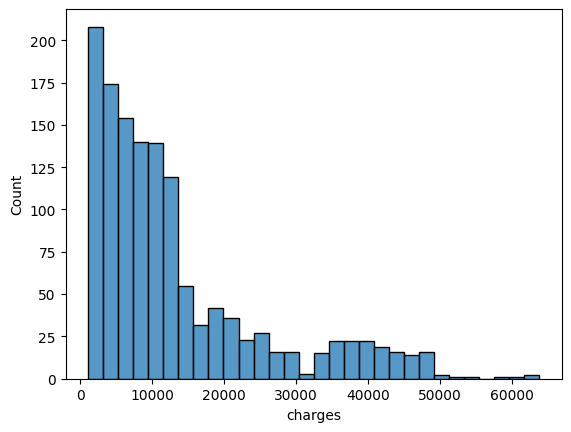

In [11]:
sns.histplot(df,
             x='charges')

# Gaussian distribution (mean and std) usuli

In [12]:
mean = df['charges'].mean()
std = df['charges'].std()
threshold = 3

upper_limit = mean + std * threshold
lower_limit = mean - std * threshold

df_no_outlires = df[ (df['charges'] >= lower_limit) & (df['charges'] <= upper_limit)]

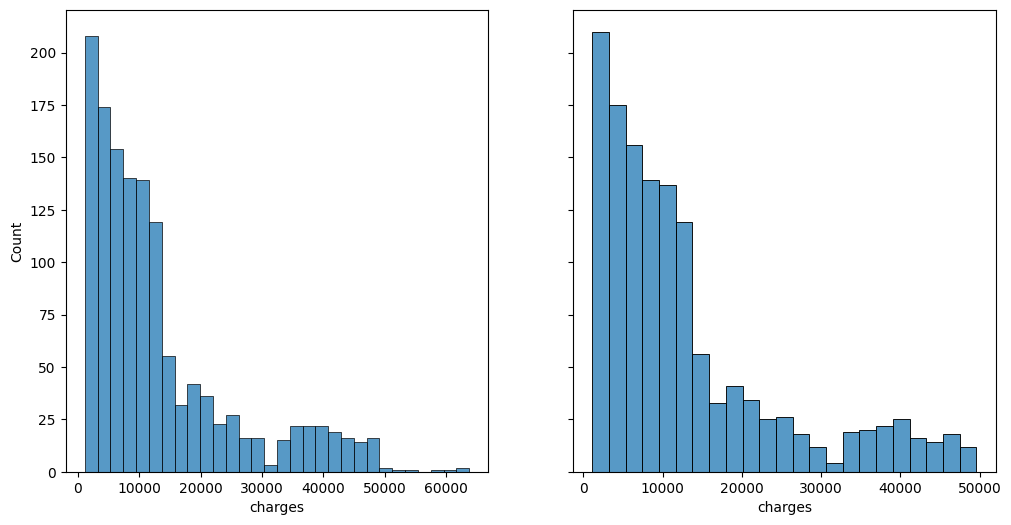

In [13]:
fig, (ax0, ax1) = plt.subplots(1,2, sharey=True)

sns.histplot(df, x='charges',  ax=ax0)
sns.histplot(df_no_outlires, x='charges', ax=ax1)
fig.set_size_inches(12,6)

# outlireslarni qiymatini ozgartirish

<Axes: >

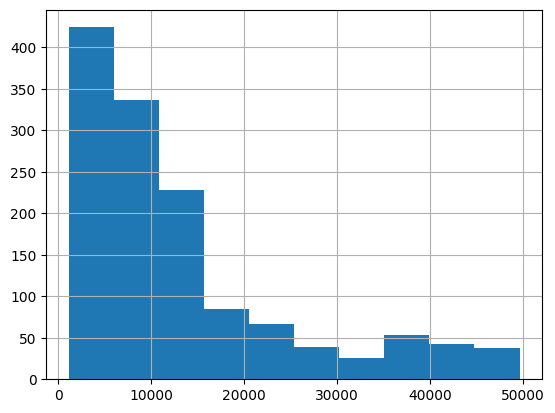

In [14]:
df.loc[df['charges'] >= upper_limit, 'charges'] = upper_limit
df.loc[df['charges'] <= lower_limit, 'charges'] = lower_limit

df['charges'].hist()

# Inter-quantal range proximity rule usuli

In [15]:
df = pd.read_csv('insurance.csv')

iqr = df['charges'].quantile(0.75) - df['charges'].quantile(0.25)

upper_limit = df['charges'].quantile(0.75) + 1.5 * iqr
lower_limit = df['charges'].quantile(0.25) - 1.5 * iqr

df_no_outlires = df[ (df['charges'] >= lower_limit) & (df['charges'] <= upper_limit)]

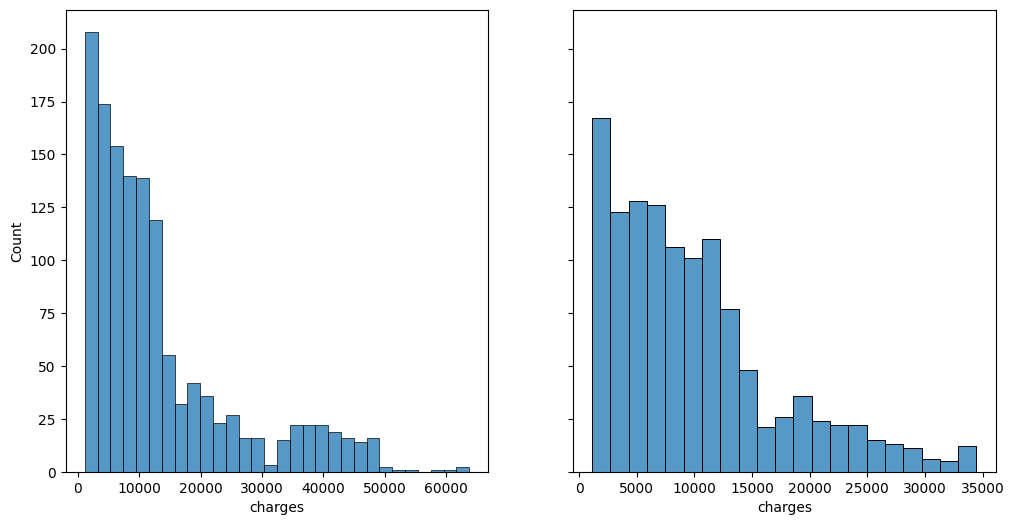

In [16]:
fig, (ax0, ax1) = plt.subplots(1,2, sharey=True)

sns.histplot(df, x='charges',  ax=ax0)
sns.histplot(df_no_outlires, x='charges', ax=ax1)
fig.set_size_inches(12,6)

# outlireslarni qiymatini ozgartirish

<Axes: >

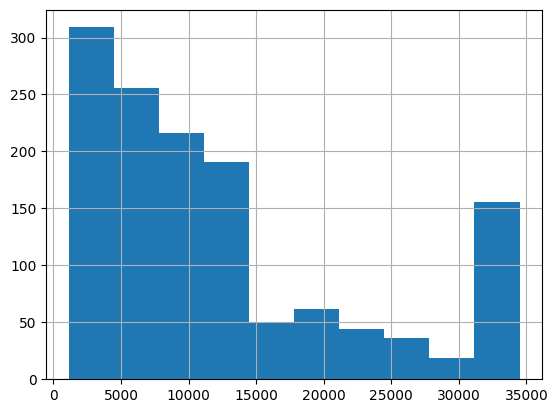

In [17]:
df.loc[df['charges'] >= upper_limit, 'charges'] = upper_limit
df.loc[df['charges'] <= lower_limit, 'charges'] = lower_limit

df['charges'].hist()

# Quantiles usuli

In [18]:
df = pd.read_csv('insurance.csv')

upper_limit = df['charges'].quantile(0.95)
lower_limit = df['charges'].quantile(0.05)

df_no_outlires = df[ (df['charges'] >= lower_limit) & (df['charges'] <= upper_limit)]

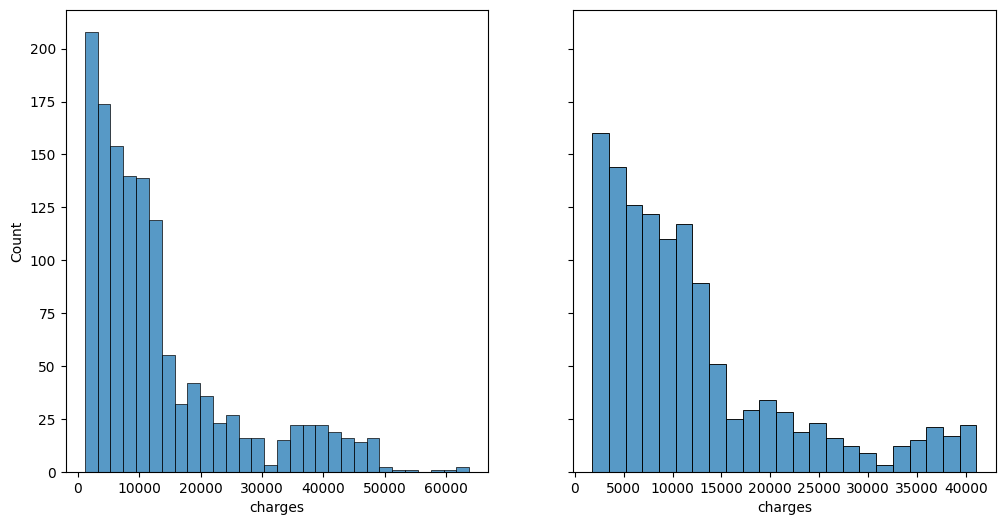

In [19]:
fig, (ax0, ax1) = plt.subplots(1,2, sharey=True)

sns.histplot(df, x='charges',  ax=ax0)
sns.histplot(df_no_outlires, x='charges', ax=ax1)
fig.set_size_inches(12,6)

# outlireslarni qiymatini ozgartirish

<Axes: >

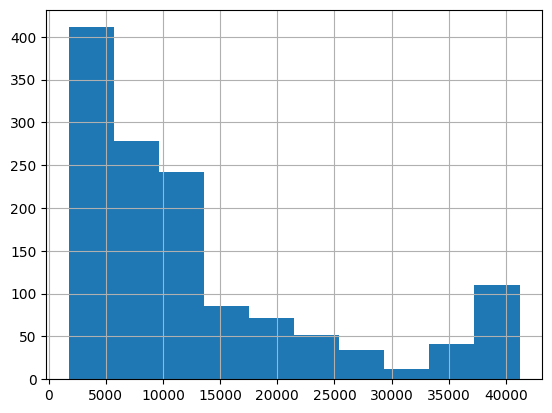

In [20]:
df.loc[df['charges'] >= upper_limit, 'charges'] = upper_limit
df.loc[df['charges'] <= lower_limit, 'charges'] = lower_limit

df['charges'].hist()